<KeysViewHDF5 ['calibrated_hyperspectral_image', 'final_wavelengths']>


Text(0.5, 1.0, 'Calibrated Spectrum')

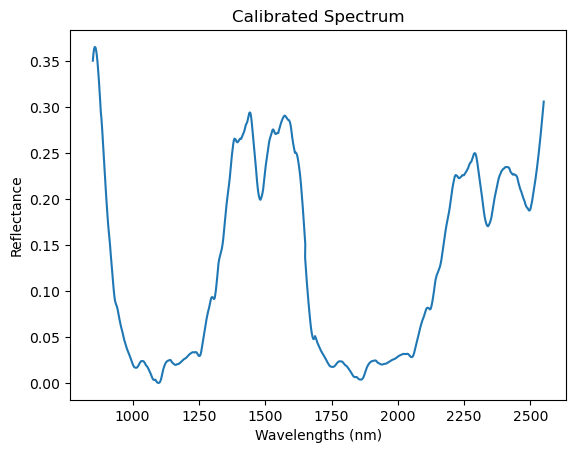

In [1]:
import h5py
from matplotlib import pyplot as plt
import numpy as np

calibrated_data_filename = 'Somewhere_300_04_09_2023_1684420276_preprocessed.hdf5'
calibrated_data_hdf5 = h5py.File(calibrated_data_filename, 'r')
print(calibrated_data_hdf5.keys())
calibrated_hyperspectral_image = calibrated_data_hdf5['calibrated_hyperspectral_image'][:]
wavelengths = calibrated_data_hdf5['final_wavelengths'][:]


current_spectrum = calibrated_hyperspectral_image[100,:]
current_spectrum = current_spectrum + np.abs(current_spectrum.min())
plt.plot(wavelengths, current_spectrum)
plt.xlabel('Wavelengths (nm)')
plt.ylabel('Reflectance')
plt.title('Calibrated Spectrum')


/tmp/ipykernel_92817/1963053397.py:24: RuntimeWarning: invalid value encountered in log
  plt.plot(wavelengths, np.log((current_spectrum - np.polyval(coefficients, wavelengths))))


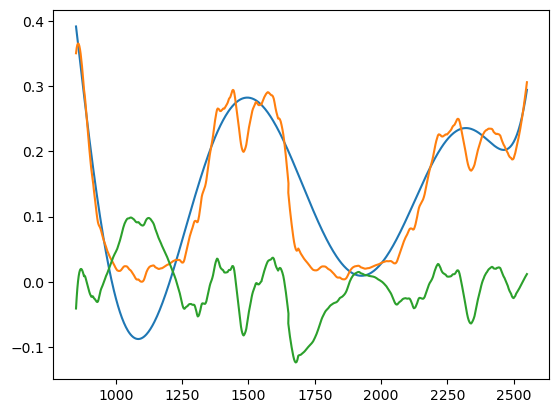

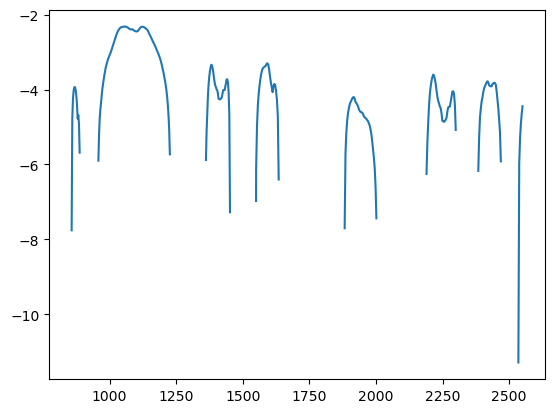

In [37]:
import numpy as np
from scipy.optimize import curve_fit

def fit_continuum(wavelengths, intensities, degree, epsilon=1e-6):
    # Define the polynomial function
    def continuum(wavelength, *coefficients):
        return np.polyval(coefficients, wavelength)

    # Define the weights
    weights = 1 / (intensities + epsilon)

    # Fit the continuum to the spectrum
    coefficients, _ = curve_fit(continuum, wavelengths, intensities, sigma=weights, p0=np.ones(degree + 1))

    return coefficients

coefficients = fit_continuum(wavelengths, current_spectrum, 7)

plt.plot(wavelengths, (np.polyval(coefficients, wavelengths)))
plt.plot(wavelengths, (current_spectrum))
plt.plot(wavelengths,  (current_spectrum - np.polyval(coefficients, wavelengths)))

plt.figure()
plt.plot(wavelengths, np.log((current_spectrum - np.polyval(coefficients, wavelengths))))

### From Railland 2021, continuum removal in AGM

The offset c0 is set to the maximum value of the spectrum, and the continuum slope c1 is set to 0 [37]. Starting values of the standard Gaussians Guv and Gwater are computed similarly in the VNIR and SWIR spectral ranges. Their positions are set to predefined values μuv = 200 nm and μwater = 2800 nm [40]. Then, we draw the line l1 joining the point of the spectrum of minimal wavelength and the point λ of the VNIR range for which ρ(λ) is maximum. The line l2 is drawn similarly by considering the last point of the spectrum and the point of maximum amplitude in the SWIR range. The amplitudes suv and swater are set to the values of l1 and l2 at μuv and μwater, with c0 removed. The widths σuv and σwater are computed according to the settings of Fig. 2. This strategy is adapted to various continuum shapes of the minerals of interest, as Guv and Gwater only influence the VNIR and SWIR ranges, respectively.

#### Init values

c0 = max(spectrum)
c1 = slope = 0
Guv 
muv = 200nm
suv = value of l1 at muv - c0

Gwater
mwater = 2800nm
swater = value of l2 at mwater - c0
siguv 

Line l1 joins spectrum[0] and argmax(spectrum_vnir)
line l2 spectrum[-1] and argmax(spectrum_swir)

